# Concept Mapping using MedCat mapper

## Define base directory

In [1]:
baseDir = '/superbugai-data/yash/temp'

## Read Concept Names

In [6]:
conceptNames = []
with open(baseDir + '/concept_names.txt') as file:
    conceptNames = [line.rstrip() for line in file]

## Read SNOMED vocabulary

In [17]:
import pandas as pd

baseDir = '/superbugai-data/yash/temp'
snomedDf = pd.read_csv(baseDir + '/preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']

In [18]:
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


## Initialise MedCat

In [9]:
# !pip install spacy==3.0.8
# !pip uninstall spacy -y

  Using cached spacy-3.0.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
  Using cached thinc-8.0.17-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (668 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

medcat 1.4.0 requires blis<=0.7.5, but you'll have blis 0.7.9 which is incompatible.
medcat 1.4.0 requires spacy<3.1.4,>=3.1.0, but you'll have spacy 3.0.8 which is incompatible.
en-core-web-md 3.1.0 requires spacy<3.2.0,>=3.1.0, but you'll have spacy 3.0.8 which is incompatible.
You should consider upgrading via the '/superbugai-data/yash/chapter_1/workspace/EHRQC/no

In [3]:
# Run it for the first time only

# !python -m spacy download en_core_web_md

     |████████████████████████████████| 47.1 MB 504 kB/s eta 0:00:011    |█▉                              | 2.7 MB 35.3 MB/s eta 0:00:02
  Attempting uninstall: en-core-web-md
    Found existing installation: en-core-web-md 3.1.0
    Uninstalling en-core-web-md-3.1.0:
      Successfully uninstalled en-core-web-md-3.1.0
You should consider upgrading via the '/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [4]:
# Run it for the first time only

# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz (125.2 MB)
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.4.0-py3-none-any.whl size=125733929 sha256=50523c028fb13873dbd4eb342bdbbe5d65501af72e7ec59e1ce048fde0b39b93
  Stored in directory: /home/yram0006/.cache/pip/wheels/64/f1/f3/5c8850c6df95b06b05f6c012733b9e3c6e62bf5851a92213d7
Successfully built en-core-sci-md
You should consider upgrading via the '/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/bin/python -m pip install --upgrade pip' command.
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz (538.1 MB)
  ERROR: Command errored out with exit status 1:
   command: /superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-req-build-8f4c2ut5/setup.py'"'"'; __file__='"'"'/tmp/pip-req-build-8f4c2ut5/setu

In [5]:
from medcat.vocab import Vocab
from medcat.cdb import CDB
from medcat.cat import CAT
from medcat.meta_cat import MetaCAT

from tqdm import tqdm

# Load the vocab model you downloaded
vocab = Vocab.load(baseDir + '/' + 'trained_vocs/shared/vocab.dat')
# Load the cdb model you downloaded
cdb = CDB.load(baseDir + '/' + 'cdb-medmen-v1_2.dat')

# Download the mc_status model from the models section below and unzip it
mc_status = MetaCAT.load(baseDir + '/' + "trained_vocs/shared/mc_status")
cat = CAT(cdb=cdb, config=cdb.config, vocab=vocab, meta_cats=[mc_status])

## Match entities using MedCat

In [7]:
out_lines = []

for line in tqdm(conceptNames):
    out_lines.append([line, cat.get_entities(line)])

100%|██████████| 3843/3843 [44:40<00:00,  1.43it/s]  


## Save mapped results

In [8]:
import pandas as pd

df = pd.DataFrame(out_lines, columns=['Concept Name', 'Mapped Entities'])
df.to_csv(baseDir + '/' + 'mapped_concept_names_medcat.csv', index=False)

## Read mapped results

In [1]:
import pandas as pd

tempDir = '/superbugai-data/yash/temp'
matchingConceptsDf = pd.read_csv(tempDir + '/mapped_concept_names_medcat_1.csv')

In [3]:
matchingConceptsDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '..."
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Infant', 'cu..."
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '..."
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


## Analyse the results

<AxesSubplot:>

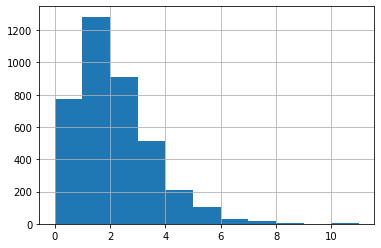

In [75]:
import ast

matchingConceptsDf["matching_concept"]\
    .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
    .apply(lambda matchingConcept: len(matchingConcept['entities']))\
    .hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [5]:
import ast

matchingConceptsDf["matching_concept"]\
    .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
    .apply(lambda matchingConcept: len(matchingConcept['entities']))\
    .value_counts()

1     1283
2      911
0      773
3      511
4      207
5      101
6       31
7       17
8        5
11       1
9        1
10       1
Name: matching_concept, dtype: int64

In [6]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in matchingConceptsDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

matchingConceptsDf['CUI'] = cuis
matchingConceptsDf['Concept Type'] = conceptTypes
matchingConceptsDf['Concept Pretty Names'] = conceptPrettyNames
matchingConceptsDf['Concept Source Values'] = conceptSourceValues
matchingConceptsDf['Context Similarity Score'] = contextSimilarityScores

In [7]:
matchingConceptsDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,[T093],Accident and Emergency department,Emergency Department,0.990000
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0025118,[T091],Medicine,Medicine,0.263208
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,[T093],Accident and Emergency department,Emergency Department,0.974958
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Infant', 'cu...",C0021270,[T100],Infant,Babies,0.271460
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0007189,[T091],Cardiology discipline,Cardiology,0.427547
...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000


In [9]:
matchingConceptsDf.CUI.notna().sum()

3069

In [10]:
matchingConceptsDf.CUI.isna().sum()

773

In [11]:
matchingConceptsDf.CUI.isna().sum()/matchingConceptsDf.shape[0]*100

20.119729307652264

In [13]:
matchingConceptsDf = matchingConceptsDf[matchingConceptsDf['concept_name'].notna()]

In [14]:
matchingConceptsDf[matchingConceptsDf['concept_name'].str.contains('STAPHYLOCOCCUS')]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
1725,2000026023,STAPHYLOCOCCUS EPIDERMIDIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS EPIDERMIDIS,0.461488
1834,2000026132,STAPHYLOCOCCUS SPECIES,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C1705920,[T185],Species,SPECIES,0.772210
1849,2000026147,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038172,[T007],Staphylococcus aureus,STAPHYLOCOCCUS,0.566780
1854,2000026152,STAPHYLOCOCCUS LUGDUNENSIS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.494116
1939,2000026236,"STAPHYLOCOCCUS SAPROPHYTICUS, PRESUMPTIVE IDEN...",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Micrococcus ...,C0318112,[T007],Micrococcus subgroup 3,STAPHYLOCOCCUS SAPROPHYTICUS,1.000000
1946,2000026243,"STAPHYLOCOCCUS, COAGULASE NEGATIVE, PRESUMPTIV...",mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038172,[T007],Staphylococcus aureus,STAPHYLOCOCCUS,0.559532
2031,2000026328,STAPHYLOCOCCUS HAEMOLYTICUS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.491775
2046,2000026343,STAPHYLOCOCCUS CAPITIS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.494651
2047,2000026344,STAPHYLOCOCCUS HOMINIS,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.499067
2048,2000026345,STAPHYLOCOCCUS WARNERI,mimiciv_micro_organism,{'entities': {0: {'pretty_name': 'Staphylococc...,C0038174,[T007],Staphylococcus epidermidis,STAPHYLOCOCCUS,0.491775


In [20]:
import pandas as pd

mergedDf = pd.merge(matchingConceptsDf, snomedDf, left_on='Concept Source Values', right_on='name')

In [21]:
mergedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score,cui,name,name_status,ontologies,description_type_ids,type_ids


In [29]:
matchingConceptsDf['Concept Type'] = matchingConceptsDf['Concept Type'].apply(lambda x: x[0] if x else None)

In [63]:
conceptTypeLookupString = """aapp|T116|Amino Acid, Peptide, or Protein
acab|T020|Acquired Abnormality
acty|T052|Activity
aggp|T100|Age Group
amas|T087|Amino Acid Sequence
amph|T011|Amphibian
anab|T190|Anatomical Abnormality
anim|T008|Animal
anst|T017|Anatomical Structure
antb|T195|Antibiotic
arch|T194|Archaeon
bacs|T123|Biologically Active Substance
bact|T007|Bacterium
bdsu|T031|Body Substance
bdsy|T022|Body System
bhvr|T053|Behavior
biof|T038|Biologic Function
bird|T012|Bird
blor|T029|Body Location or Region
bmod|T091|Biomedical Occupation or Discipline
bodm|T122|Biomedical or Dental Material
bpoc|T023|Body Part, Organ, or Organ Component
bsoj|T030|Body Space or Junction
celc|T026|Cell Component
celf|T043|Cell Function
cell|T025|Cell
cgab|T019|Congenital Abnormality
chem|T103|Chemical
chvf|T120|Chemical Viewed Functionally
chvs|T104|Chemical Viewed Structurally
clas|T185|Classification
clna|T201|Clinical Attribute
clnd|T200|Clinical Drug
cnce|T077|Conceptual Entity
comd|T049|Cell or Molecular Dysfunction
crbs|T088|Carbohydrate Sequence
diap|T060|Diagnostic Procedure
dora|T056|Daily or Recreational Activity
drdd|T203|Drug Delivery Device
dsyn|T047|Disease or Syndrome
edac|T065|Educational Activity
eehu|T069|Environmental Effect of Humans
elii|T196|Element, Ion, or Isotope
emod|T050|Experimental Model of Disease
emst|T018|Embryonic Structure
enty|T071|Entity
enzy|T126|Enzyme
euka|T204|Eukaryote
evnt|T051|Event
famg|T099|Family Group
ffas|T021|Fully Formed Anatomical Structure
fish|T013|Fish
fndg|T033|Finding
fngs|T004|Fungus
food|T168|Food
ftcn|T169|Functional Concept
genf|T045|Genetic Function
geoa|T083|Geographic Area
gngm|T028|Gene or Genome
gora|T064|Governmental or Regulatory Activity
grpa|T102|Group Attribute
grup|T096|Group
hcpp|T068|Human-caused Phenomenon or Process
hcro|T093|Health Care Related Organization
hlca|T058|Health Care Activity
hops|T131|Hazardous or Poisonous Substance
horm|T125|Hormone
humn|T016|Human
idcn|T078|Idea or Concept
imft|T129|Immunologic Factor
inbe|T055|Individual Behavior
inch|T197|Inorganic Chemical
inpo|T037|Injury or Poisoning
inpr|T170|Intellectual Product
irda|T130|Indicator, Reagent, or Diagnostic Aid
lang|T171|Language
lbpr|T059|Laboratory Procedure
lbtr|T034|Laboratory or Test Result
mamm|T015|Mammal
mbrt|T063|Molecular Biology Research Technique
mcha|T066|Machine Activity
medd|T074|Medical Device
menp|T041|Mental Process
mnob|T073|Manufactured Object
mobd|T048|Mental or Behavioral Dysfunction
moft|T044|Molecular Function
mosq|T085|Molecular Sequence
neop|T191|Neoplastic Process
nnon|T114|Nucleic Acid, Nucleoside, or Nucleotide
npop|T070|Natural Phenomenon or Process
nusq|T086|Nucleotide Sequence
ocac|T057|Occupational Activity
ocdi|T090|Occupation or Discipline
orch|T109|Organic Chemical
orga|T032|Organism Attribute
orgf|T040|Organism Function
orgm|T001|Organism
orgt|T092|Organization
ortf|T042|Organ or Tissue Function
patf|T046|Pathologic Function
phob|T072|Physical Object
phpr|T067|Phenomenon or Process
phsf|T039|Physiologic Function
phsu|T121|Pharmacologic Substance
plnt|T002|Plant
podg|T101|Patient or Disabled Group
popg|T098|Population Group
prog|T097|Professional or Occupational Group
pros|T094|Professional Society
qlco|T080|Qualitative Concept
qnco|T081|Quantitative Concept
rcpt|T192|Receptor
rept|T014|Reptile
resa|T062|Research Activity
resd|T075|Research Device
rnlw|T089|Regulation or Law
sbst|T167|Substance
shro|T095|Self-help or Relief Organization
socb|T054|Social Behavior
sosy|T184|Sign or Symptom
spco|T082|Spatial Concept
tisu|T024|Tissue
tmco|T079|Temporal Concept
topp|T061|Therapeutic or Preventive Procedure
virs|T005|Virus
vita|T127|Vitamin
vtbt|T010|Vertebrate"""

In [64]:
import pandas as pd

conceptTypeDf = pd.DataFrame([line.strip().split('|') for line in conceptTypeLookupString.split('\n')], columns=['concept_type_abbreviation', 'concept_type_code', 'concept_type_name'])
conceptTypeDf

,concept_type_abbreviation,concept_type_code,concept_type_name
0,aapp,T116,"Amino Acid, Peptide, or Protein"
1,acab,T020,Acquired Abnormality
2,acty,T052,Activity
3,aggp,T100,Age Group
4,amas,T087,Amino Acid Sequence
...,...,...,...
122,tmco,T079,Temporal Concept
123,topp,T061,Therapeutic or Preventive Procedure
124,virs,T005,Virus
125,vita,T127,Vitamin


In [65]:
mergedDf = pd.merge(matchingConceptsDf, conceptTypeDf, left_on='Concept Type', right_on='concept_type_code', how='left')
mergedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score,concept_type_abbreviation,concept_type_code,concept_type_name
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,T093,Accident and Emergency department,Emergency Department,0.990000,hcro,T093,Health Care Related Organization
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0025118,T091,Medicine,Medicine,0.263208,bmod,T091,Biomedical Occupation or Discipline
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,{'entities': {1: {'pretty_name': 'Accident and...,C0562508,T093,Accident and Emergency department,Emergency Department,0.974958,hcro,T093,Health Care Related Organization
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Infant', 'cu...",C0021270,T100,Infant,Babies,0.271460,aggp,T100,Age Group
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Medicine', '...",C0007189,T091,Cardiology discipline,Cardiology,0.427547,bmod,T091,Biomedical Occupation or Discipline
...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.000000,NaN,NaN,NaN


In [69]:
groupedDf = mergedDf\
    .groupby(['concept_vocabulary_id', 'concept_type_name'])\
        .agg(
                {
                    'concept_name':'count',
                }
            )\
                .reset_index()
groupedDf

,concept_vocabulary_id,concept_type_name,concept_name
0,mimiciv_cs_place_of_service,Age Group,1
1,mimiciv_cs_place_of_service,Biomedical Occupation or Discipline,2
2,mimiciv_cs_place_of_service,Health Care Related Organization,2
3,mimiciv_drug_ndc,Antibiotic,49
4,mimiciv_drug_ndc,Bacterium,1
...,...,...,...
301,mimiciv_vis_service,"Body Part, Organ, or Organ Component",3
302,mimiciv_vis_service,Body System,3
303,mimiciv_vis_service,Injury or Poisoning,1
304,mimiciv_vis_service,Mental Process,1


In [70]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_cs_place_of_service']

,concept_vocabulary_id,concept_type_name,concept_name
0,mimiciv_cs_place_of_service,Age Group,1
1,mimiciv_cs_place_of_service,Biomedical Occupation or Discipline,2
2,mimiciv_cs_place_of_service,Health Care Related Organization,2


In [71]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_micro_organism']

,concept_vocabulary_id,concept_type_name,concept_name
144,mimiciv_micro_organism,Bacterium,123
145,mimiciv_micro_organism,Classification,59
146,mimiciv_micro_organism,Eukaryote,4
147,mimiciv_micro_organism,Finding,13
148,mimiciv_micro_organism,Fungus,30
149,mimiciv_micro_organism,Idea or Concept,8
150,mimiciv_micro_organism,Immunologic Factor,1
151,mimiciv_micro_organism,Laboratory Procedure,1
152,mimiciv_micro_organism,Laboratory or Test Result,1
153,mimiciv_micro_organism,Organism,1


In [72]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_drug_ndc']

,concept_vocabulary_id,concept_type_name,concept_name
3,mimiciv_drug_ndc,Antibiotic,49
4,mimiciv_drug_ndc,Bacterium,1
5,mimiciv_drug_ndc,Biologically Active Substance,17
6,mimiciv_drug_ndc,Biomedical or Dental Material,51
7,mimiciv_drug_ndc,"Body Part, Organ, or Organ Component",3
8,mimiciv_drug_ndc,Body Space or Junction,15
9,mimiciv_drug_ndc,Body System,1
10,mimiciv_drug_ndc,Cell Function,1
11,mimiciv_drug_ndc,Clinical Drug,1
12,mimiciv_drug_ndc,Disease or Syndrome,1


In [73]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_drug_route']

,concept_vocabulary_id,concept_type_name,concept_name
39,mimiciv_drug_route,Activity,2
40,mimiciv_drug_route,Body Location or Region,2
41,mimiciv_drug_route,"Body Part, Organ, or Organ Component",8
42,mimiciv_drug_route,Body Space or Junction,2
43,mimiciv_drug_route,Disease or Syndrome,1
44,mimiciv_drug_route,Functional Concept,3
45,mimiciv_drug_route,Manufactured Object,3
46,mimiciv_drug_route,Medical Device,2
47,mimiciv_drug_route,Organism Function,1
48,mimiciv_drug_route,Quantitative Concept,2


In [74]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_proc_datetimeevents']

,concept_vocabulary_id,concept_type_name,concept_name
234,mimiciv_proc_datetimeevents,"Body Part, Organ, or Organ Component",6
235,mimiciv_proc_datetimeevents,Body Space or Junction,4
236,mimiciv_proc_datetimeevents,Disease or Syndrome,2
237,mimiciv_proc_datetimeevents,Enzyme,5
238,mimiciv_proc_datetimeevents,Functional Concept,26
239,mimiciv_proc_datetimeevents,Health Care Activity,18
240,mimiciv_proc_datetimeevents,Health Care Related Organization,1
241,mimiciv_proc_datetimeevents,Idea or Concept,1
242,mimiciv_proc_datetimeevents,Injury or Poisoning,4
243,mimiciv_proc_datetimeevents,Intellectual Product,1
